# Car Price Prediction

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [2]:
data = pd.read_csv('D:\Working\DP_100\Data files\CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Dropping the unwanted columns 

In [3]:
data = data.drop(['car_ID','symboling','CarName'],axis=1)
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Getting the categorical column names

In [4]:
cat_features = []
num_features = []
for i in range(0,len(data.columns)):
    if isinstance(data.iloc[0,i],(str)):
        cat_features.append(data.columns[i])

In [6]:
cat_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

# Plotting the boxplot to the categorical columns by price 

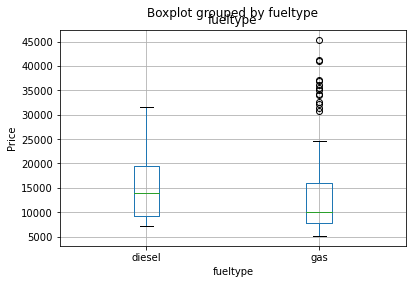

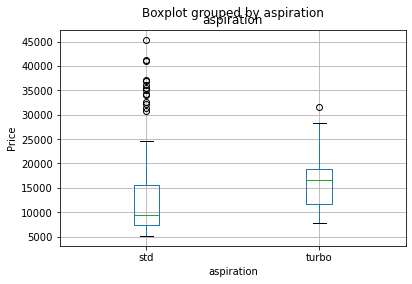

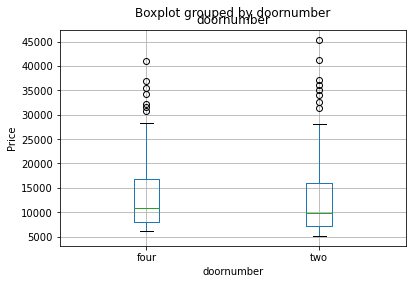

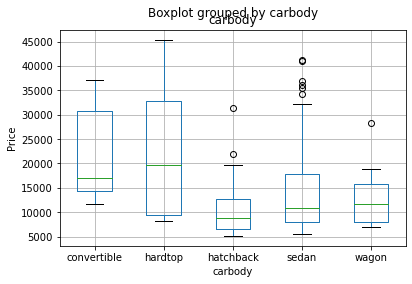

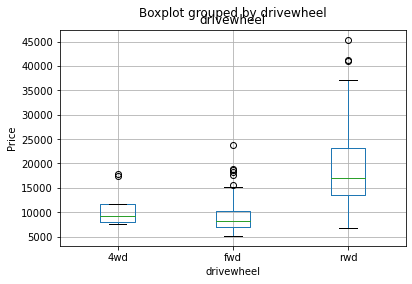

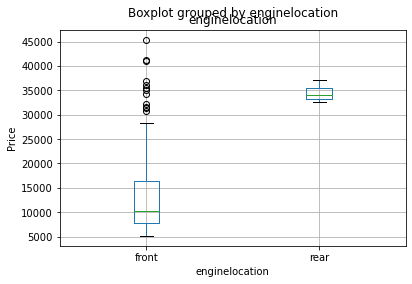

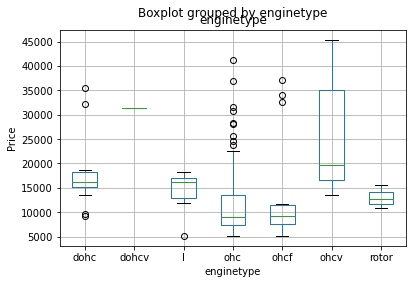

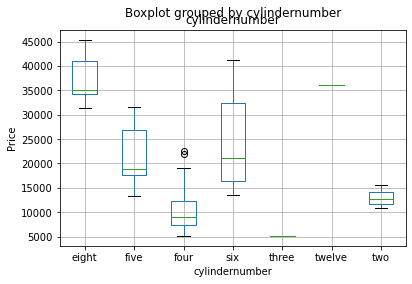

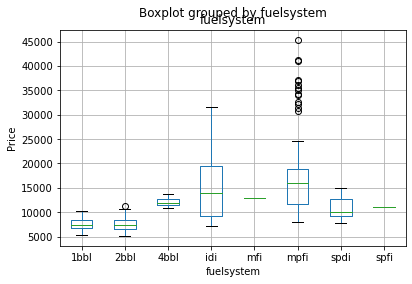

In [10]:
for col in cat_features:
    data.boxplot(column='price',by=col)
    plt.title(col)
    plt.ylabel('Price')
    plt.xlabel(col)
plt.show()

In [11]:
carBody = np.unique(data['carbody']).tolist()
carBody

['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

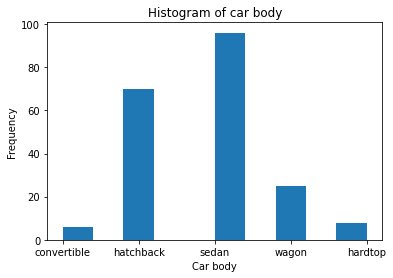

In [12]:
plt.hist(data['carbody'])
plt.title('Histogram of car body')
plt.xlabel('Car body')
plt.ylabel('Frequency')
plt.show()

1. Sedan type car is most bought car among all the cars
2. Convertible and hardtop cars are least bought among all the cars

In [13]:
avg_price = []
for col in carBody:
    avg_price.append(data[data.carbody == col]['price'].mean())
avg_price

[21890.5, 22208.5, 10376.652385714286, 14344.270833333334, 12371.96]

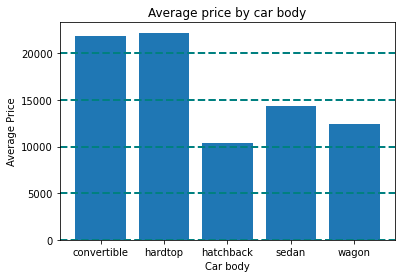

In [17]:
plt.bar(x=carBody,height=avg_price)
plt.title('Average price by car body')
plt.xlabel('Car body')
plt.ylabel('Average Price')
plt.grid(axis='y',linestyle='--',linewidth=2,color='teal')
plt.show()

1. Price of convertible and hardtop is comparatively higher.
2. Hatchback car's price is comparatively less

In [19]:
highwayMpg = []
cityMpg = []
for col in carBody:
    highwayMpg.append(data[data.carbody == col]['highwaympg'].mean())
    cityMpg.append(data[data.carbody == col]['citympg'].mean())


In [20]:
df = pd.DataFrame({'CarBody':carBody,'highwayMpg':highwayMpg,'cityMpg':cityMpg})
df

,CarBody,highwayMpg,cityMpg
0,convertible,26.000000,20.500000
1,hardtop,27.250000,21.625000
2,hatchback,32.171429,26.314286
3,sedan,30.833333,25.322917
4,wagon,28.720000,24.040000


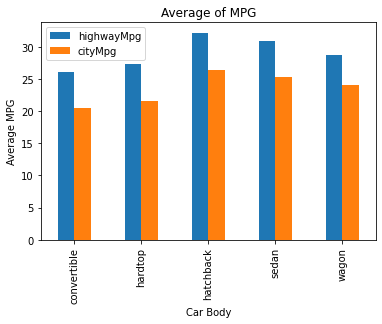

In [21]:
df.plot.bar(x='CarBody',y=['highwayMpg','cityMpg'])
plt.title('Average of MPG')
plt.xlabel('Car Body')
plt.ylabel('Average MPG')
plt.show()

1. Hatchback car is giving high mpg among all other cars

In [23]:
num_features = data.columns.drop(cat_features+['price']).tolist()
num_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [27]:
categorical_features = []
for col in cat_features:
    categorical_features.append(data.columns.get_loc(col))
categorical_features

[0, 1, 2, 3, 4, 5, 11, 12, 14]

In [28]:
numeric_features = []
for col in num_features:
    numeric_features.append(data.columns.get_loc(col))
numeric_features

[6, 7, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 21]

In [38]:
data_normal = data.copy()
data_normal.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
for col in cat_features:
    data_normal[col] = LabelEncoder().fit_transform(data[col])
data_normal.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
model_ = []
pipline_ = []
normal_ = []

In [42]:
x,y = data_normal.drop(['price'],axis=1).values,data_normal['price'].values
x.shape

(205, 22)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [44]:
from sklearn.metrics import r2_score,make_scorer

In [50]:
def model_fitting(model):
    model.fit(x_train,y_train)
    predicted = model.predict(x_test)
    name = str(model)
    index = name.index('(')
    name = name[0:index]
    r2 = r2_score(y_test,predicted)
    model_.append(name)
    normal_.append(r2)
    df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
    print(df)

In [51]:
model  = LinearRegression()
model_fitting(model)

     Actual     Predicted
0   10698.0  10644.564213
1    6918.0   7307.377714
2    7975.0   8964.503311
3    8558.0   8202.372858
4   15580.0  18654.652369
..      ...           ...
57  16925.0  12709.806931
58   9258.0   7255.470527
59   9279.0  11157.166317
60   6785.0   7566.964613
61  11850.0  12197.863032

[62 rows x 2 columns]


In [54]:
from sklearn.linear_model import Lasso
model = Lasso()
model_fitting(model)

     Actual     Predicted
0   10698.0  10726.693780
1    6918.0   7291.039096
2    7975.0   8992.271574
3    8558.0   8210.203535
4   15580.0  18551.187113
..      ...           ...
57  16925.0  12673.011630
58   9258.0   7243.072190
59   9279.0  11131.154486
60   6785.0   7530.597824
61  11850.0  12233.095286

[62 rows x 2 columns]


In [55]:
model = DecisionTreeRegressor()
model_fitting(model)

     Actual  Predicted
0   10698.0    10795.0
1    6918.0     7898.0
2    7975.0     8195.0
3    8558.0     7689.0
4   15580.0    16630.0
..      ...        ...
57  16925.0    16430.0
58   9258.0     7738.0
59   9279.0     9279.0
60   6785.0     6989.0
61  11850.0    12170.0

[62 rows x 2 columns]


In [56]:
model = RandomForestRegressor(n_estimators=100)
model_fitting(model)

     Actual  Predicted
0   10698.0  10998.175
1    6918.0   8038.160
2    7975.0   8184.860
3    8558.0   7969.285
4   15580.0  14772.970
..      ...        ...
57  16925.0  13899.000
58   9258.0   7817.550
59   9279.0   9886.100
60   6785.0   9090.910
61  11850.0  13086.630

[62 rows x 2 columns]


In [57]:
model = GradientBoostingRegressor(learning_rate=0.5,n_estimators=100)
model_fitting(model)

     Actual     Predicted
0   10698.0  12399.787957
1    6918.0   7906.719957
2    7975.0   8222.865493
3    8558.0   8614.674854
4   15580.0  17296.186752
..      ...           ...
57  16925.0  16236.824765
58   9258.0   7812.601534
59   9279.0   9277.128045
60   6785.0   9903.437918
61  11850.0  12868.882912

[62 rows x 2 columns]


In [58]:
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline(steps=[('Sclaer',StandardScaler())])
categorical_transformer = Pipeline(steps=[('Onehot',OneHotEncoder())])
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)])
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('Linregress',LinearRegression())])


In [60]:
x,y = data.drop(['price'],axis=1).values,data['price'].values

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [65]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Sclaer',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9, 10, 13, 15, 16,
                                                   17, 18, 19, 20, 21]),
                                                 ('cat',
                                                  Pipeline(steps=[('Onehot',
                                                                   OneHotEncoder())]),
                                                  [0, 1, 2, 3, 4, 5, 11, 12,
                                                   14])])),
                ('Linregress', LinearRegression())])

In [67]:
pipline_ = []

In [68]:
predicted = pipeline.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
r2 = r2_score(y_test,predicted)
pipline_.append(r2)
print(r2)
print(df)

0.7191177953586398
     Actual     Predicted
0    6855.0   7300.025990
1    8949.0  10243.703302
2    7099.0   9936.008081
3   15510.0  14844.984222
4   40960.0  24835.978525
..      ...           ...
57   7053.0   5185.762741
58   8499.0   9882.348741
59   6938.0   8209.574734
60  10198.0   9212.488308
61   8195.0   9128.554649

[62 rows x 2 columns]


In [69]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('Lasso',Lasso())])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Sclaer',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9, 10, 13, 15, 16,
                                                   17, 18, 19, 20, 21]),
                                                 ('cat',
                                                  Pipeline(steps=[('Onehot',
                                                                   OneHotEncoder())]),
                                                  [0, 1, 2, 3, 4, 5, 11, 12,
                                                   14])])),
                ('Lasso', Lasso())])

In [70]:
pipeline.fit(x_train,y_train)
predicted = pipeline.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
r2 = r2_score(y_test,predicted)
pipline_.append(r2)
print(r2)
print(df)

0.780356957560348
     Actual     Predicted
0    6855.0   7248.524729
1    8949.0  10199.198254
2    7099.0   9570.836951
3   15510.0  14789.050235
4   40960.0  27688.124947
..      ...           ...
57   7053.0   5173.512963
58   8499.0   9724.350528
59   6938.0   8137.670984
60  10198.0   9147.645308
61   8195.0   9132.344155

[62 rows x 2 columns]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4127870.052974701, tolerance: 759281.4667933567
  model = cd_fast.enet_coordinate_descent(


In [71]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('Lasso',DecisionTreeRegressor())])
pipeline.fit(x_train,y_train)
predicted = pipeline.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
r2 = r2_score(y_test,predicted)
pipline_.append(r2)
print(r2)
print(df)

0.9182673452028287
     Actual  Predicted
0    6855.0     6377.0
1    8949.0     8921.0
2    7099.0     7995.0
3   15510.0    12170.0
4   40960.0    36880.0
..      ...        ...
57   7053.0     8358.0
58   8499.0     6989.0
59   6938.0     7499.0
60  10198.0    11259.0
61   8195.0     8495.0

[62 rows x 2 columns]


In [72]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('Lasso',RandomForestRegressor(n_estimators=100))])
pipeline.fit(x_train,y_train)
predicted = pipeline.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
r2 = r2_score(y_test,predicted)
pipline_.append(r2)
print(r2)
print(df)

0.9338479681224698
     Actual     Predicted
0    6855.0   6334.050000
1    8949.0   9630.660000
2    7099.0   7536.300000
3   15510.0  13258.700000
4   40960.0  35004.895000
..      ...           ...
57   7053.0   7905.860000
58   8499.0   8556.338333
59   6938.0   7489.230000
60  10198.0   9973.060000
61   8195.0   8556.893333

[62 rows x 2 columns]


In [73]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('Lasso',GradientBoostingRegressor())])
pipeline.fit(x_train,y_train)
predicted = pipeline.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
r2 = r2_score(y_test,predicted)
pipline_.append(r2)
print(r2)
print(df)

0.939099687978652
     Actual     Predicted
0    6855.0   6511.244952
1    8949.0   8988.387448
2    7099.0   6627.416261
3   15510.0  13798.649452
4   40960.0  35320.848028
..      ...           ...
57   7053.0   6296.943629
58   8499.0   7989.219905
59   6938.0   7759.643738
60  10198.0   9814.974980
61   8195.0   8040.719486

[62 rows x 2 columns]


In [74]:
accuracy_df = pd.DataFrame({'Model':model_,'Normal_R2':normal_,'Pipeline_R2':pipline_})
accuracy_df

,Model,Normal_R2,Pipeline_R2
0,LinearRegression,0.828273,0.719118
1,Lasso,0.828310,0.780357
2,DecisionTreeRegressor,0.829151,0.918267
3,RandomForestRegressor,0.883481,0.933848
4,GradientBoostingRegressor,0.904825,0.939100


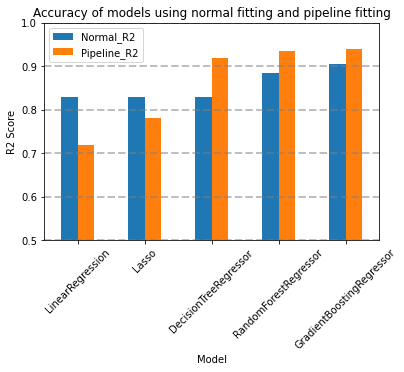

In [108]:
accuracy_df.plot.bar(x='Model',y=['Normal_R2','Pipeline_R2'])
plt.title('Accuracy of models using normal fitting and pipeline fitting')
plt.xlabel('Model')
plt.ylim(0.5,1)
plt.xticks(rotation=45)
plt.ylabel('R2 Score')
plt.grid(axis='y',color='gray',linestyle='--',linewidth=2,alpha=0.5)
plt.show()

1. The ensemble algorithms are providing a good results.
2. The accuracy is increased when the pipeline used to fit a model